## Radioactive decay chain

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Tl0= 1000
Pb0= 0
t= 3.052*60  
time= 300  
time_val= np.arange(0, time+1, 1)
Tl_atoms= np.zeros(time+1)
Pb_atoms= np.zeros(time+1)

for t in range(1, time+1):
    decay_prob= 1- 2 **(-t/t)
    decayed_atoms = np.random.rand(Tl0)<decay_prob
    Tl_atoms[t] = Tl0- np.sum(decayed_atoms)
    Pb_atoms[t] =Pb0+ np.sum(decayed_atoms)

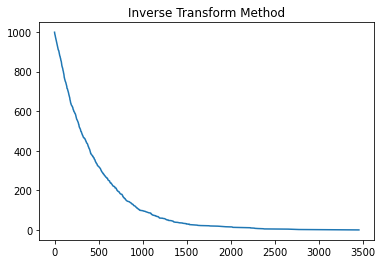

In [2]:
#inverse transform method
rand_nb = np.random.rand(Tl0)
decay_times = -t * np.log(1 - rand_nb)/ np.log(2)
decay_times.sort()

resid_atoms = Tl0- np.arange(1, Tl0+ 1)

plt.plot(decay_times, resid_atoms)
plt.title('Inverse Transform Method')
plt.show()


## Monte Carlo integration: hit/miss vs mean value method

In [3]:
def f(x):
    return np.sin(1 / (1 - x))**2

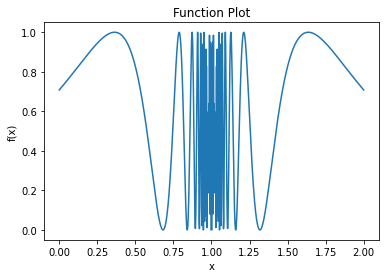

In [4]:
x= np.linspace(0, 2, 1000)
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function Plot')
plt.show()

In [13]:
def moc_hit_miss():
    x_random = np.random.uniform(0,2,1000)
    y_random = np.random.uniform(0,1,1000)
    integral_values = np.where(y_random < f(x_random), 1, 0)
    estimate = np.mean(integral_values)
    error = np.std(integral_values) / np.sqrt(1000)

    return estimate, error

In [14]:
estimate, error= moc_hit_miss()

In [15]:
def moc_mean_value():
    x_rand = np.random.uniform(0, 2, 1000)
    f_val= f(x_rand)
    estimate = np.mean(f_val)
    error=np.std(f_val) / np.sqrt(1000)
    return estimate, error

In [16]:
estimate1, error1= moc_mean_value()

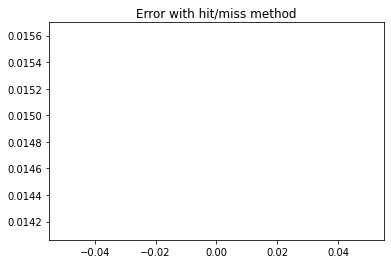

In [19]:
plt.plot( error)
plt.title('Error with hit/miss method')
plt.show()

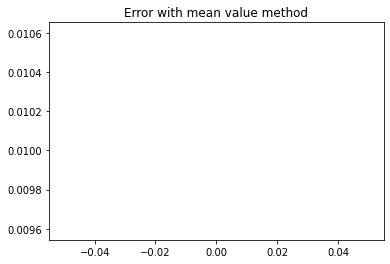

In [21]:
plt.plot( error1)
plt.title('Error with mean value method')
plt.show()

## Monte Carlo integration in high dimension

In [22]:
#for a circle
x= np.random.uniform(-1, 1, 1000)
y= np.random.uniform(-1, 1,1000)

pts= np.sum(x**2 +y**2 <= 1)
z = pts /1000

In [23]:
z

0.789

In [24]:
# for a 10D sphere
x= np.random.uniform(-1, 1,size=(1000, 10))

pts= np.sum(np.sum(x**2, axis=1) <= 1)
z = pts /1000

In [25]:
z

0.003

## Monte Carlo integration with importance sampling

In [26]:
#generating random samples
x=np.random.uniform(0, 1,1000)**2
integrand_val= x**(-1/2) / (np.exp(x)+1)
weight_val = 1 / np.sqrt(x)

# Monte Carlo estimate 
estimate = np.mean(integrand_val/ weight_val)

In [27]:
estimate

0.42312207526725587